* https://gist.github.com/demidovakatya/cfdf48316497c03e1893
* http://glebmikhaylov.com/%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0/


In [88]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import random
%matplotlib inline
random.seed(1)

https://ru.wikipedia.org/wiki/%D0%91%D0%B8%D0%BD%D0%BE%D0%BC%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

## Биномиальное_распределение



In [89]:
n=50
p=0.7
sample = stats.binom(n, p)
sample_beta= sample.rvs(10)

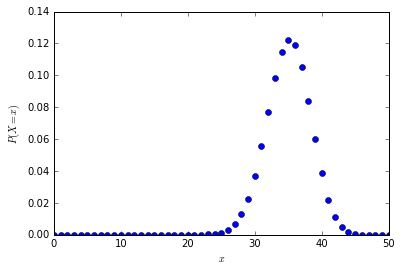

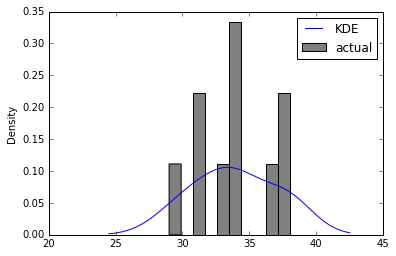

In [94]:
x = np.linspace(0,50,51)
pmf = sample.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

df = pd.DataFrame(sample_beta, columns=['KDE'])
ax = df.plot(kind='density')

plt.hist(sample_beta,normed=True,color='grey',label='actual')
plt.legend()

$$ {\mathbb  {E}}[Y]=np $$
$$ {\mathbb  {D}}[Y]=npq $$

In [91]:
MU = n*p
SIGMA =MU*1
print MU

35.0


In [95]:
def clt(sample,sub_sample_size,n_sub_samples=1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0,len(sample),sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = SIGMA/sqrt(sub_sample_size) # стандартная ошибка среднего
    
    norm_rv = stats.norm(MU,SE)
    
    print 'Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(MU,mu)
    print 'Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE,sigma)
    print 'Приближенное среднее 95% доверительный интервал = {:.2f} +/- {:.2f}'.format(mu,2*SE)
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Теоретическое среднее vs приближенное: 35.00 vs 33.88
Теоретическое стандартное откл. vs приближенное: 15.65 vs 1.30
Приближенное среднее 95% доверительный интервал = 33.88 +/- 31.30


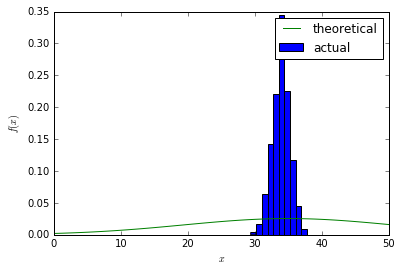

In [96]:
clt(sample_beta,5)

Теоретическое среднее vs приближенное: 35.00 vs 33.85
Теоретическое стандартное откл. vs приближенное: 11.07 vs 0.92
Приближенное среднее 95% доверительный интервал = 33.85 +/- 22.14


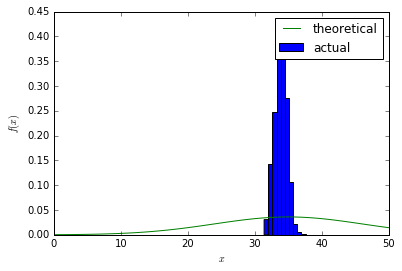

In [97]:
clt(sample_beta,10)

Теоретическое среднее vs приближенное: 35.00 vs 33.89
Теоретическое стандартное откл. vs приближенное: 4.95 vs 0.40
Приближенное среднее 95% доверительный интервал = 33.89 +/- 9.90


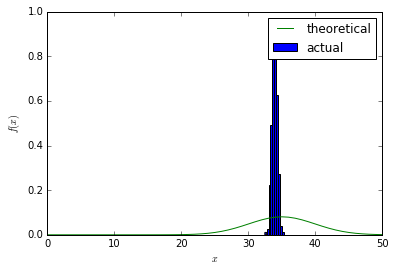

In [98]:
clt(sample_beta,50)